# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [53]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['thompson', 'nikolskoye', 'ushuaia', 'surt', 'merritt', 'dinsor', 'bluff', 'codrington', 'rikitea', 'nador', 'miram shah', 'mataura', 'souillac', 'vaitupu', 'isoka', 'cayenne', 'leningradskiy', 'taolanaro', 'iqaluit', 'belushya guba', 'barentsburg', 'tuktoyaktuk', 'saskylakh', 'hasaki', 'jiayuguan', 'castro', 'axim', 'hobart', 'perg', 'chuy', 'phan thiet', 'tsihombe', 'port elizabeth', 'omsukchan', 'guerrero negro', 'busselton', 'nelson bay', 'cape town', 'sobolevo', 'jamestown', 'faanui', 'los algarrobos', 'bati', 'chokurdakh', 'changli', 'te anau', 'san quintin', 'east london', 'tabiauea', 'vaini', 'hay river', 'yar-sale', 'new norfolk', 'husavik', 'horadiz', 'kontagora', 'port alfred', 'imeni poliny osipenko', 'bredasdorp', 'mar del plata', 'abu dhabi', 'zhetybay', 'atuona', 'dikson', 'rawson', 'gazni', 'albany', 'hermanus', 'berlevag', 'hoa binh', 'luderitz', 'punta arenas', 'zyryanka', 'talah', 'cabo san lucas', 'kaitangata', 'rungata', 'qostanay', 'steinbach', 'barrow', 'constan

In [54]:
#create new data frame with cities
weather_df = pd.DataFrame({'City':cities,"Cloudiness":"","Country":"","Date":"","Humidity":"","Lat":"","Lng":"","Max Temp":"","Wind Speed":""})
weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,thompson,,,,,,,,
1,nikolskoye,,,,,,,,
2,ushuaia,,,,,,,,
3,surt,,,,,,,,
4,merritt,,,,,,,,
5,dinsor,,,,,,,,
6,bluff,,,,,,,,
7,codrington,,,,,,,,
8,rikitea,,,,,,,,
9,nador,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
for index, row in weather_df.iterrows():
    
    city = row['City']
    
    try:

        # Save config information
        url = "http://api.openweathermap.org/data/2.5/weather?"

        # Build query URL
        query_url = url + "appid=" + api_key + "&units=imperial"+ "&q=" + city

        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Get the temperature from the response
        print(f"The weather API responded with: {weather_json}.")

        Cloudiness = weather_json['clouds']['all']
        Country = weather_json['sys']['country']
        Date = weather_json["dt"]
        Humidity = weather_json['main']['humidity']
        Lat = weather_json['coord']['lat']
        Lng = weather_json['coord']['lon']
        Max_Temp = weather_json['main']['temp_max']
        Wind_Speed = weather_json['wind']['speed']

        print(f"The results for {city} are:")
        print(Cloudiness)
        print(Country)
        print(Date)
        print(Humidity)
        print(Lat)
        print(Lng)
        print(Max_Temp)
        print(Wind_Speed)

    except KeyError:

        print("No City Found")


    weather_df.loc[index, "Cloudiness"] = Cloudiness
    weather_df.loc[index, "Country"] = Country
    weather_df.loc[index, "Date"] = Date
    weather_df.loc[index, "Humidity"] = Humidity
    weather_df.loc[index, "Lat"] = Lat
    weather_df.loc[index, "Lng"] = Lng
    weather_df.loc[index, "Max Temp"] = Max_Temp
    weather_df.loc[index, "Wind Speed"] = Wind_Speed

print("All searches complete")
weather_df


The weather API responded with: {'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.6, 'pressure': 1015, 'humidity': 68, 'temp_min': 26.6, 'temp_max': 26.6}, 'visibility': 24140, 'wind': {'speed': 6.93, 'deg': 20}, 'clouds': {'all': 75}, 'dt': 1552532400, 'sys': {'type': 1, 'id': 935, 'message': 0.0047, 'country': 'CA', 'sunrise': 1552567746, 'sunset': 1552609989}, 'id': 6165406, 'name': 'Thompson', 'cod': 200}.
The results for thompson are:
75
CA
1552532400
68
55.74
-97.86
26.6
6.93
The weather API responded with: {'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.53, 'pressure': 1007, 'humidity': 85, 'temp_min': 19.4, 'temp_max': 21}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1552537535, 'sys': {'type': 1, 'id'

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': -133.03, 'lat': 69.44}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -18.41, 'pressure': 1025, 'humidity': 75, 'temp_min': -18.41, 'temp_max': -18.41}, 'visibility': 24140, 'wind': {'speed': 10.29, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1552536000, 'sys': {'type': 1, 'id': 942, 'message': 0.0041, 'country': 'CA', 'sunrise': 1552576650, 'sunset': 1552618016}, 'id': 6170031, 'name': 'Tuktoyaktuk', 'cod': 200}.
The results for tuktoyaktuk are:
20
CA
1552536000
75
69.44
-133.03
-18.41
10.29
The weather API responded with: {'coord': {'lon': 114.09, 'lat': 71.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -15.7, 'pressure': 1015.21, 'humidity': 46, 'temp_min': -15.7, 'temp_max': -15.7, 'sea_le

The weather API responded with: {'coord': {'lon': -79.94, 'lat': -3.25}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 89.6, 'pressure': 1010, 'humidity': 33, 'temp_min': 89.6, 'temp_max': 89.6}, 'visibility': 10000, 'wind': {'speed': 1.12}, 'clouds': {'all': 90}, 'dt': 1552532400, 'sys': {'type': 1, 'id': 8673, 'message': 0.0035, 'country': 'EC', 'sunrise': 1552562703, 'sunset': 1552606361}, 'id': 3654533, 'name': 'LOS ALGARROBOS', 'cod': 200}.
The results for los algarrobos are:
90
EC
1552532400
33
-3.25
-79.94
89.6
1.12
The weather API responded with: {'coord': {'lon': 40.02, 'lat': 11.19}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.43, 'pressure': 1012.69, 'humidity': 79, 'temp_min': 66.43, 'temp_max': 66.43, 'sea_level': 1012.69, 'grnd_level': 902.2}, 'wind': {'speed': 4.27, 'deg': 133}, 'clouds': {'all': 76}, '

The weather API responded with: {'coord': {'lon': 136.49, 'lat': 52.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.7, 'pressure': 1014.65, 'humidity': 84, 'temp_min': 26.7, 'temp_max': 26.7, 'sea_level': 1014.65, 'grnd_level': 998.84}, 'wind': {'speed': 4.83, 'deg': 12.0002}, 'clouds': {'all': 80}, 'dt': 1552537598, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1552511521, 'sunset': 1552553739}, 'id': 2023584, 'name': 'Imeni Poliny Osipenko', 'cod': 200}.
The results for imeni poliny osipenko are:
80
RU
1552537598
84
52.42
136.49
26.7
4.83
The weather API responded with: {'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 60.87, 'pressure': 1018, 'humidity': 93, 'temp_min': 59, 'temp_max': 62.01}, 'wind': {'speed': 1.12, 'deg': 220}, 'rain': {'3h': 0.11}, 'clouds': {'all': 100}, 

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': 63.58, 'lat': 53.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 37.4, 'pressure': 1009, 'humidity': 92, 'temp_min': 37.4, 'temp_max': 37.4}, 'visibility': 10000, 'wind': {'speed': 15.66, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1552536000, 'sys': {'type': 1, 'id': 8835, 'message': 0.0035, 'country': 'KZ', 'sunrise': 1552529008, 'sunset': 1552571244}, 'id': 1519928, 'name': 'Qostanay', 'cod': 200}.
The results for qostanay are:
0
KZ
1552536000
92
53.17
63.58
37.4
15.66
The weather API responded with: {'coord': {'lon': -96.69, 'lat': 49.53}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.34, 'pressure': 1006, 'humidity': 74, 'temp_min': 28.99, 'temp_max': 32}, 'visibility': 24140, 'win

The weather API responded with: {'coord': {'lon': 25.72, 'lat': 66.5}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.6, 'pressure': 998, 'humidity': 92, 'temp_min': 17.6, 'temp_max': 17.6}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1552535400, 'sys': {'type': 1, 'id': 1354, 'message': 0.0034, 'country': 'FI', 'sunrise': 1552538510, 'sunset': 1552579955}, 'id': 638936, 'name': 'Rovaniemi', 'cod': 200}.
The results for rovaniemi are:
75
FI
1552535400
92
66.5
25.72
17.6
8.05
The weather API responded with: {'coord': {'lon': 94.92, 'lat': 20.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.86, 'pressure': 1014.85, 'humidity': 48, 'temp_min': 86.86, 'temp_max': 86.86, 'sea_level': 1014.85, 'grnd_level': 1001.88}, 'wind': {'speed': 4.38, 'deg': 345.5}, 'clouds': {'all': 0}, 'dt': 155

The weather API responded with: {'coord': {'lon': 37.3, 'lat': 57.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 17.29, 'pressure': 1015.69, 'humidity': 77, 'temp_min': 17.29, 'temp_max': 17.29, 'sea_level': 1015.69, 'grnd_level': 995.64}, 'wind': {'speed': 4.61, 'deg': 152.5}, 'clouds': {'all': 44}, 'dt': 1552537608, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1552535415, 'sunset': 1552577460}, 'id': 550949, 'name': 'Kesova Gora', 'cod': 200}.
The results for kesova gora are:
44
RU
1552537608
77
57.58
37.3
17.29
4.61
The weather API responded with: {'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1010, 'humidity': 74, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 80}, 'clouds': {'all': 100}, 'dt': 155253

The weather API responded with: {'coord': {'lon': 29.37, 'lat': 58.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.58, 'pressure': 1005.85, 'humidity': 92, 'temp_min': 29.58, 'temp_max': 29.58, 'sea_level': 1005.85, 'grnd_level': 995.32}, 'wind': {'speed': 7.4, 'deg': 153.5}, 'clouds': {'all': 80}, 'dt': 1552537610, 'sys': {'message': 0.0038, 'country': 'RU', 'sunrise': 1552537338, 'sunset': 1552579345}, 'id': 508743, 'name': 'Plyussa', 'cod': 200}.
The results for plyussa are:
80
RU
1552537610
92
58.42
29.37
29.58
7.4
The weather API responded with: {'coord': {'lon': 136.69, 'lat': 35.03}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 49.28, 'pressure': 1020, 'humidity': 49, 'temp_min': 46, 'temp_max': 54}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1552537444, 

The weather API responded with: {'coord': {'lon': 23.78, 'lat': 2.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 73.5, 'pressure': 1007.69, 'humidity': 93, 'temp_min': 73.5, 'temp_max': 73.5, 'sea_level': 1007.69, 'grnd_level': 959.24}, 'wind': {'speed': 2.15, 'deg': 157.5}, 'clouds': {'all': 20}, 'dt': 1552537612, 'sys': {'message': 0.0083, 'country': 'CD', 'sunrise': 1552537879, 'sunset': 1552581414}, 'id': 220448, 'name': 'Aketi', 'cod': 200}.
The results for aketi are:
20
CD
1552537612
93
2.74
23.78
73.5
2.15
The weather API responded with: {'coord': {'lon': -151.02, 'lat': -16.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 83.26, 'pressure': 1008.41, 'humidity': 99, 'temp_min': 83.26, 'temp_max': 83.26, 'sea_level': 1008.41, 'grnd_level': 1007.08}, 'wind': {'speed': 14.45, 'deg': 313.5}, 'clouds': {'all': 80}, 'dt':

The weather API responded with: {'coord': {'lon': -72.07, 'lat': -45.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 37.4, 'pressure': 1017, 'humidity': 86, 'temp_min': 37.4, 'temp_max': 37.4}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1552536000, 'sys': {'type': 1, 'id': 8482, 'message': 0.0068, 'country': 'CL', 'sunrise': 1552560154, 'sunset': 1552605085}, 'id': 3894426, 'name': 'Coihaique', 'cod': 200}.
The results for coihaique are:
0
CL
1552536000
86
-45.58
-72.07
37.4
5.82
The weather API responded with: {'coord': {'lon': -121.92, 'lat': 36.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 49.77, 'pressure': 1023, 'humidity': 66, 'temp_min': 44.01, 'temp_max': 54}, 'visibility': 16093, 'wind': {'speed': 3.36}, 'clouds': {'all': 1}, 'dt': 1552537564, 'sys': {'type': 1, 'id': 4980, '

The weather API responded with: {'coord': {'lon': 18.6, 'lat': -4.54}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 72.69, 'pressure': 1008.05, 'humidity': 91, 'temp_min': 72.69, 'temp_max': 72.69, 'sea_level': 1008.05, 'grnd_level': 959.88}, 'wind': {'speed': 2.71, 'deg': 290}, 'clouds': {'all': 24}, 'dt': 1552537620, 'sys': {'message': 0.0035, 'country': 'CD', 'sunrise': 1552539043, 'sunset': 1552582730}, 'id': 2316259, 'name': 'Bulungu', 'cod': 200}.
The results for bulungu are:
24
CD
1552537620
91
-4.54
18.6
72.69
2.71
The weather API responded with: {'coord': {'lon': -78.55, 'lat': -0.39}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.73, 'pressure': 1026, 'humidity': 87, 'temp_min': 51.01, 'temp_max': 59}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 10}, 'clouds': {'all': 75}, 'dt': 1552536958, 'sys': {'type': 

The weather API responded with: {'coord': {'lon': 57.76, 'lat': -20.21}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 81.37, 'pressure': 1013, 'humidity': 74, 'temp_min': 80.6, 'temp_max': 82}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 240}, 'clouds': {'all': 20}, 'dt': 1552537445, 'sys': {'type': 1, 'id': 2061, 'message': 0.0032, 'country': 'MU', 'sunrise': 1552529451, 'sunset': 1552573515}, 'id': 1106643, 'name': 'Quatre Cocos', 'cod': 200}.
The results for quatre cocos are:
20
MU
1552537445
74
-20.21
57.76
82
9.17
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': -114.38, 'lat': 62.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 2.19, 'pressure': 1021, 'humidity': 84, 'temp_min': 1, 'temp_max': 3.99}, 'visibility': 24140, 'win

The weather API responded with: {'coord': {'lon': -77.61, 'lat': -11.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.49, 'pressure': 1010.33, 'humidity': 91, 'temp_min': 69.49, 'temp_max': 69.49, 'sea_level': 1010.33, 'grnd_level': 972.2}, 'wind': {'speed': 0.13, 'deg': 353.5}, 'clouds': {'all': 0}, 'dt': 1552537626, 'sys': {'message': 0.003, 'country': 'PE', 'sunrise': 1552562058, 'sunset': 1552605881}, 'id': 3939761, 'name': 'Hualmay', 'cod': 200}.
The results for hualmay are:
0
PE
1552537626
91
-11.1
-77.61
69.49
0.13
The weather API responded with: {'coord': {'lon': 75.45, 'lat': 63.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32.86, 'pressure': 1003.29, 'humidity': 97, 'temp_min': 32.86, 'temp_max': 32.86, 'sea_level': 1003.29, 'grnd_level': 989.08}, 'wind': {'speed': 14, 'deg': 244}, 'clouds': {'all': 88}, 'dt':

The weather API responded with: {'coord': {'lon': 10.6, 'lat': 10.41}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.53, 'pressure': 1007.49, 'humidity': 32, 'temp_min': 70.53, 'temp_max': 70.53, 'sea_level': 1007.49, 'grnd_level': 961}, 'wind': {'speed': 7.63, 'deg': 40.5002}, 'clouds': {'all': 0}, 'dt': 1552537628, 'sys': {'message': 0.003, 'country': 'NG', 'sunrise': 1552541122, 'sunset': 1552584502}, 'id': 2347758, 'name': 'Bara', 'cod': 200}.
The results for bara are:
0
NG
1552537628
32
10.41
10.6
70.53
7.63
The weather API responded with: {'coord': {'lon': -83.04, 'lat': 12.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.07, 'pressure': 1012.77, 'humidity': 99, 'temp_min': 80.07, 'temp_max': 80.07, 'sea_level': 1012.77, 'grnd_level': 1012.76}, 'wind': {'speed': 15.9, 'deg': 59.5002}, 'clouds': {'all': 80}, 'dt': 15

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 32.38, 'pressure': 981, 'humidity': 100, 'temp_min': 32, 'temp_max': 33.01}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 160}, 'clouds': {'all': 20}, 'dt': 1552536995, 'sys': {'type': 1, 'id': 90, 'message': 0.0041, 'country': 'IS', 'sunrise': 1552549922, 'sunset': 1552591639}, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}.
The results for grindavik are:
20
IS
1552536995
100
63.84
-22.43
33.01
9.17
The weather API responded with: {'coord': {'lon': 170.5, 'lat': -45.87}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 57, 'pressure': 1022, 'humidity': 64, 'temp_min': 57, 'temp_max': 57}, 'wind': {'speed': 8.99, 'deg': 4

The weather API responded with: {'coord': {'lon': 6.74, 'lat': 7.8}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 76.33, 'pressure': 1007.17, 'humidity': 87, 'temp_min': 76.33, 'temp_max': 76.33, 'sea_level': 1007.17, 'grnd_level': 984.6}, 'wind': {'speed': 6.62, 'deg': 204}, 'clouds': {'all': 20}, 'dt': 1552537632, 'sys': {'message': 0.0035, 'country': 'NG', 'sunrise': 1552542021, 'sunset': 1552585454}, 'id': 2331939, 'name': 'Lokoja', 'cod': 200}.
The results for lokoja are:
20
NG
1552537632
87
7.8
6.74
76.33
6.62
The weather API responded with: {'coord': {'lon': -84.33, 'lat': 9.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.79, 'pressure': 1016, 'humidity': 68, 'temp_min': 64.99, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 110, 'gust': 13.9}, 'clouds': {'all': 0}, 'dt': 1552537431, 'sys': {'ty

The weather API responded with: {'coord': {'lon': -50.22, 'lat': -30.17}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 71.16, 'pressure': 1009.97, 'humidity': 89, 'temp_min': 71.16, 'temp_max': 71.16, 'sea_level': 1009.97, 'grnd_level': 1000.12}, 'wind': {'speed': 9.19, 'deg': 301.5}, 'clouds': {'all': 12}, 'dt': 1552537636, 'sys': {'message': 0.0035, 'country': 'BR', 'sunrise': 1552555225, 'sunset': 1552599551}, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}.
The results for cidreira are:
12
BR
1552537636
89
-30.17
-50.22
71.16
9.19
The weather API responded with: {'coord': {'lon': -51.74, 'lat': 64.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.4, 'pressure': 1007, 'humidity': 60, 'temp_min': 10.4, 'temp_max': 10.4}, 'wind': {'speed': 11.41, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1552535400, 'sys': {'type': 1, 'id': 86, 

The weather API responded with: {'coord': {'lon': 28.09, 'lat': -14.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 59.91, 'pressure': 1010.93, 'humidity': 65, 'temp_min': 59.91, 'temp_max': 59.91, 'sea_level': 1010.93, 'grnd_level': 885.08}, 'wind': {'speed': 2.93, 'deg': 82.5002}, 'clouds': {'all': 8}, 'dt': 1552537641, 'sys': {'message': 0.003, 'country': 'ZM', 'sunrise': 1552536645, 'sunset': 1552580564}, 'id': 920233, 'name': 'Chibombo', 'cod': 200}.
The results for chibombo are:
8
ZM
1552537641
65
-14.68
28.09
59.91
2.93
The weather API responded with: {'coord': {'lon': 13.58, 'lat': 7.32}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.73, 'pressure': 1007.49, 'humidity': 35, 'temp_min': 68.73, 'temp_max': 68.73, 'sea_level': 1007.49, 'grnd_level': 879.24}, 'wind': {'speed': 6.51, 'deg': 349}, 'clouds': {'all': 64}, '

The weather API responded with: {'coord': {'lon': 100.99, 'lat': 3.68}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 89.6, 'pressure': 1013, 'humidity': 70, 'temp_min': 89.6, 'temp_max': 89.6}, 'visibility': 10000, 'wind': {'speed': 5.82}, 'clouds': {'all': 75}, 'dt': 1552536000, 'sys': {'type': 1, 'id': 9426, 'message': 0.0037, 'country': 'MY', 'sunrise': 1552519363, 'sunset': 1552562877}, 'id': 1735199, 'name': 'Sungai Besar', 'cod': 200}.
The results for sungai besar are:
75
MY
1552536000
70
3.68
100.99
89.6
5.82
The weather API responded with: {'coord': {'lon': 75.81, 'lat': 41.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 14.73, 'pressure': 1027.69, 'humidity': 66, 'temp_min': 14.73, 'temp_max': 14.73, 'sea_level': 1027.69, 'grnd_level': 761.48}, 'wind': {'speed': 2.04, 'deg': 107.5}, 'clouds': {'all': 0}, 'dt': 155253

The weather API responded with: {'coord': {'lon': 49.05, 'lat': -13.19}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 73.68, 'pressure': 1012.77, 'humidity': 97, 'temp_min': 73.68, 'temp_max': 73.68, 'sea_level': 1012.77, 'grnd_level': 989.24}, 'wind': {'speed': 3.94, 'deg': 94.0002}, 'rain': {'3h': 0.16}, 'clouds': {'all': 92}, 'dt': 1552537648, 'sys': {'message': 0.0034, 'country': 'MG', 'sunrise': 1552531633, 'sunset': 1552575519}, 'id': 1082243, 'name': 'Ambilobe', 'cod': 200}.
The results for ambilobe are:
92
MG
1552537648
97
-13.19
49.05
73.68
3.94
The weather API responded with: {'coord': {'lon': -126.83, 'lat': 65.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 1.4, 'pressure': 1021, 'humidity': 77, 'temp_min': 1.4, 'temp_max': 1.4}, 'visibility': 48279, 'wind': {'speed': 2.24, 'deg': 10}, 'clouds': {'all': 20}, 'dt': 15

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': 75.46, 'lat': 16.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.81, 'pressure': 1015.13, 'humidity': 29, 'temp_min': 78.81, 'temp_max': 78.81, 'sea_level': 1015.13, 'grnd_level': 951.88}, 'wind': {'speed': 5.28, 'deg': 46.0002}, 'clouds': {'all': 0}, 'dt': 1552537650, 'sys': {'message': 0.0028, 'country': 'IN', 'sunrise': 1552525623, 'sunset': 1552568880}, 'id': 1267239, 'name': 'Hosakote', 'cod': 200}.
The results for hosakote are:
0
IN
1552537650
29
16.06
75.46
78.81
5.28
The weather API responded with: {'coord': {'lon': 9.34, 'lat': 11.76}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.51, 'pressure': 1008.69, 'humidity': 30, 'temp_min': 72.51, 'temp_max': 72.51, 'sea_level': 1008.69

The weather API responded with: {'coord': {'lon': -5.63, 'lat': 40.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 30.57, 'pressure': 1032.41, 'humidity': 87, 'temp_min': 30.57, 'temp_max': 30.57, 'sea_level': 1032.41, 'grnd_level': 923.88}, 'wind': {'speed': 3.94, 'deg': 9.50021}, 'clouds': {'all': 0}, 'dt': 1552537652, 'sys': {'message': 0.0037, 'country': 'ES', 'sunrise': 1552545364, 'sunset': 1552588081}, 'id': 3112703, 'name': 'Puerto Castilla', 'cod': 200}.
The results for puerto castilla are:
0
ES
1552537652
87
40.29
-5.63
30.57
3.94
The weather API responded with: {'coord': {'lon': 85.66, 'lat': 22.04}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 77.68, 'pressure': 1015.97, 'humidity': 69, 'temp_min': 77.68, 'temp_max': 77.68, 'sea_level': 1015.97, 'grnd_level': 971.48}, 'wind': {'speed': 4.61, 'deg': 287}, 'clouds': {'

The weather API responded with: {'coord': {'lon': -41.05, 'lat': -21.64}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 83.94, 'pressure': 1011.93, 'humidity': 93, 'temp_min': 83.94, 'temp_max': 83.94, 'sea_level': 1011.93, 'grnd_level': 1011.88}, 'wind': {'speed': 26.53, 'deg': 36.5002}, 'clouds': {'all': 32}, 'dt': 1552537659, 'sys': {'message': 0.005, 'country': 'BR', 'sunrise': 1552553151, 'sunset': 1552597233}, 'id': 3448903, 'name': 'Sao Joao da Barra', 'cod': 200}.
The results for sao joao da barra are:
32
BR
1552537659
93
-21.64
-41.05
83.94
26.53
The weather API responded with: {'coord': {'lon': 45.06, 'lat': -25.17}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 71.61, 'pressure': 1015.21, 'humidity': 79, 'temp_min': 71.61, 'temp_max': 71.61, 'sea_level': 1015.21, 'grnd_level': 998.84}, 'wind': {'speed': 13.11, 'de

The weather API responded with: {'coord': {'lon': 85.28, 'lat': 25.32}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1015, 'humidity': 41, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 3500, 'wind': {'speed': 4.7, 'deg': 320}, 'clouds': {'all': 75}, 'dt': 1552536000, 'sys': {'type': 1, 'id': 9129, 'message': 0.0035, 'country': 'IN', 'sunrise': 1552523372, 'sunset': 1552566426}, 'id': 1270102, 'name': 'Hilsa', 'cod': 200}.
The results for hilsa are:
75
IN
1552536000
41
25.32
85.28
78.8
4.7
The weather API responded with: {'coord': {'lon': -2.46, 'lat': 41.76}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 33.01, 'pressure': 1031, 'humidity': 77, 'temp_min': 33.01, 'temp_max': 33.01}, 'wind': {'speed': 7.18, 'deg': 328.5}, 'rain': {'3h': 0.01}, 'snow': {'3h': 0.003}, 'clouds': {'all': 36}, 'dt': 1552536988, 'sy

The weather API responded with: {'coord': {'lon': -135.01, 'lat': 68.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -5.81, 'pressure': 1022, 'humidity': 70, 'temp_min': -5.81, 'temp_max': -5.81}, 'visibility': 24140, 'wind': {'speed': 9.17, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1552536000, 'sys': {'type': 1, 'id': 796, 'message': 0.0042, 'country': 'CA', 'sunrise': 1552577060, 'sunset': 1552618549}, 'id': 5882953, 'name': 'Aklavik', 'cod': 200}.
The results for aklavik are:
75
CA
1552536000
70
68.22
-135.01
-5.81
9.17
The weather API responded with: {'coord': {'lon': -51.15, 'lat': -29.76}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.54, 'pressure': 1010, 'humidity': 83, 'temp_min': 63, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1552537663, 'sys': {'type': 1

The weather API responded with: {'coord': {'lon': 142.8, 'lat': 47.32}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 28.4, 'pressure': 1009, 'humidity': 79, 'temp_min': 28.4, 'temp_max': 28.4}, 'visibility': 9000, 'wind': {'speed': 17.9, 'deg': 360, 'gust': 13}, 'clouds': {'all': 75}, 'dt': 1552536000, 'sys': {'type': 1, 'id': 8889, 'message': 0.003, 'country': 'RU', 'sunrise': 1552509902, 'sunset': 1552552321}, 'id': 2125945, 'name': 'Dolinsk', 'cod': 200}.
The results for dolinsk are:
75
RU
1552536000
79
47.32
142.8
28.4
17.9
The weather API responded with: {'coord': {'lon': -81.71, 'lat': 43.74}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 39.25, 'pressure': 1015, 'humidity': 85, 'temp_min': 37.99, 'temp_max': 41}, 'wind': {'speed': 8.01, 'deg': 131, 'gust': 4.92}, 'rain': {'3h': 0.44}, 'snow': {}, 'clouds': {'all': 80}, 

The weather API responded with: {'coord': {'lon': -63.06, 'lat': 18.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 76.28, 'pressure': 1017, 'humidity': 73, 'temp_min': 75.99, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1552537015, 'sys': {'type': 1, 'id': 8801, 'message': 0.0039, 'country': 'AI', 'sunrise': 1552558873, 'sunset': 1552602108}, 'id': 3573374, 'name': 'The Valley', 'cod': 200}.
The results for the valley are:
20
AI
1552537015
73
18.22
-63.06
77
6.93
The weather API responded with: {'coord': {'lon': -88.27, 'lat': 21.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.94, 'pressure': 1013.81, 'humidity': 57, 'temp_min': 78.94, 'temp_max': 78.94, 'sea_level': 1013.81, 'grnd_level': 1010.52}, 'wind': {'speed': 10.09, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1

8.05
The weather API responded with: {'coord': {'lon': -60.77, 'lat': -19.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.06, 'pressure': 1011.09, 'humidity': 93, 'temp_min': 72.06, 'temp_max': 72.06, 'sea_level': 1011.09, 'grnd_level': 990.6}, 'wind': {'speed': 7.96, 'deg': 247}, 'clouds': {'all': 0}, 'dt': 1552537675, 'sys': {'message': 0.0032, 'country': 'PY', 'sunrise': 1552557907, 'sunset': 1552601942}, 'id': 3867427, 'name': 'Mayor Pablo Lagerenza', 'cod': 200}.
The results for mayor pablo lagerenza are:
0
PY
1552537675
93
-19.93
-60.77
72.06
7.96
The weather API responded with: {'coord': {'lon': 32.53, 'lat': 34.92}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 1006, 'humidity': 81, 'temp_min': 51.8, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 30}, 'clouds': {

The weather API responded with: {'coord': {'lon': -111.1, 'lat': 30.17}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52, 'pressure': 1013, 'humidity': 85, 'temp_min': 52, 'temp_max': 52}, 'wind': {'speed': 4.16, 'deg': 288}, 'rain': {'3h': 0.06}, 'clouds': {'all': 92}, 'dt': 1552537516, 'sys': {'type': 3, 'id': 2011448, 'message': 0.0034, 'country': 'MX', 'sunrise': 1552570523, 'sunset': 1552613525}, 'id': 4017152, 'name': 'Benjamin Hill', 'cod': 200}.
The results for benjamin hill are:
92
MX
1552537516
85
30.17
-111.1
52
4.16
The weather API responded with: {'coord': {'lon': 53.91, 'lat': 65.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 17.74, 'pressure': 1011.81, 'humidity': 85, 'temp_min': 17.74, 'temp_max': 17.74, 'sea_level': 1011.81, 'grnd_level': 998.2}, 'wind': {'speed': 4.72, 'deg': 339}, 'clouds': {'all': 0}, '

The weather API responded with: {'coord': {'lon': -82.75, 'lat': 22.99}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 73.18, 'pressure': 1018, 'humidity': 88, 'temp_min': 73, 'temp_max': 73.4}, 'visibility': 9000, 'wind': {'speed': 5.82, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1552537390, 'sys': {'type': 1, 'id': 7236, 'message': 0.0038, 'country': 'CU', 'sunrise': 1552563646, 'sunset': 1552606789}, 'id': 3547600, 'name': 'Mariel', 'cod': 200}.
The results for mariel are:
20
CU
1552537390
88
22.99
-82.75
73.4
5.82
The weather API responded with: {'coord': {'lon': -3.62, 'lat': 40.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 37.96, 'pressure': 1030, 'humidity': 64, 'temp_min': 33.8, 'temp_max': 43}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1552537489, 'sys': {'type': 1, 'id': 6421

The weather API responded with: {'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -8.36, 'pressure': 1018.49, 'humidity': 64, 'temp_min': -8.36, 'temp_max': -8.36, 'sea_level': 1018.49, 'grnd_level': 1009.64}, 'wind': {'speed': 0.92, 'deg': 49.5002}, 'clouds': {'all': 0}, 'dt': 1552537684, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1552506187, 'sunset': 1552547223}, 'id': 2126199, 'name': 'Cherskiy', 'cod': 200}.
The results for cherskiy are:
0
RU
1552537684
64
68.75
161.3
-8.36
0.92
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': 31.93, 'lat': -3}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 61.71, 'pres

The weather API responded with: {'coord': {'lon': 150.85, 'lat': -34.58}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 75.61, 'pressure': 1011, 'humidity': 69, 'temp_min': 73, 'temp_max': 79}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 110}, 'clouds': {'all': 75}, 'dt': 1552537626, 'sys': {'type': 1, 'id': 9594, 'message': 0.004, 'country': 'AU', 'sunrise': 1552506864, 'sunset': 1552551411}, 'id': 6255012, 'name': 'Flinders', 'cod': 200}.
The results for flinders are:
75
AU
1552537626
69
-34.58
150.85
79
8.05
The weather API responded with: {'coord': {'lon': 6.5, 'lat': 47.69}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 40.05, 'pressure': 1018, 'humidity': 80, 'temp_min': 37, 'temp_max': 42.01}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 250}, 'clouds': {'all': 90}, 'dt': 1552537631, 'sys'

The weather API responded with: {'coord': {'lon': 142.82, 'lat': -4.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 87.18, 'pressure': 1007.25, 'humidity': 72, 'temp_min': 87.18, 'temp_max': 87.18, 'sea_level': 1007.25, 'grnd_level': 991.48}, 'wind': {'speed': 3.94, 'deg': 277}, 'clouds': {'all': 8}, 'dt': 1552537688, 'sys': {'message': 0.0029, 'country': 'PG', 'sunrise': 1552509237, 'sunset': 1552552922}, 'id': 2100933, 'name': 'Ambunti', 'cod': 200}.
The results for ambunti are:
8
PG
1552537688
72
-4.22
142.82
87.18
3.94
The weather API responded with: {'coord': {'lon': -8.83, 'lat': 39.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.53, 'pressure': 1031, 'humidity': 93, 'temp_min': 34, 'temp_max': 46.99}, 'visibility': 10000, 'wind': {'speed': 1.12}, 'clouds': {'all': 0}, 'dt': 1552537507, 'sys': {'type': 1, 'id': 6896, 'me

The weather API responded with: {'coord': {'lon': 61.74, 'lat': 25.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 59.1, 'pressure': 1018.93, 'humidity': 94, 'temp_min': 59.1, 'temp_max': 59.1, 'sea_level': 1018.93, 'grnd_level': 1017.64}, 'wind': {'speed': 3.15, 'deg': 51.5002}, 'clouds': {'all': 0}, 'dt': 1552537692, 'sys': {'message': 0.0028, 'country': 'PK', 'sunrise': 1552529015, 'sunset': 1552572081}, 'id': 1175712, 'name': 'Jiwani', 'cod': 200}.
The results for jiwani are:
0
PK
1552537692
94
25.05
61.74
59.1
3.15
The weather API responded with: {'coord': {'lon': 122.97, 'lat': 39.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 35.01, 'pressure': 1023, 'humidity': 93, 'temp_min': 35.01, 'temp_max': 35.01}, 'wind': {'speed': 13, 'deg': 166.5}, 'clouds': {'all': 0}, 'dt': 1552537512, 'sys': {'type': 3, 'id': 2001378, 'message

The weather API responded with: {'coord': {'lon': -96.78, 'lat': 47.93}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 30.11, 'pressure': 1000, 'humidity': 95, 'temp_min': 28, 'temp_max': 33.8}, 'visibility': 3219, 'wind': {'speed': 11.41, 'deg': 20}, 'rain': {'1h': 0.25}, 'snow': {'1h': 0.13}, 'clouds': {'all': 90}, 'dt': 1552537405, 'sys': {'type': 1, 'id': 3637, 'message': 0.0043, 'country': 'US', 'sunrise': 1552567332, 'sunset': 1552609868}, 'id': 5059429, 'name': 'Key West', 'cod': 200}.
The results for key west are:
90
US
1552537405
95
47.93
-96.78
33.8
11.41
The weather API responded with: {'coord': {'lon': -127.42, 'lat': 50.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.8, 'p

The weather API responded with: {'coord': {'lon': -80.6, 'lat': 28.41}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.84, 'pressure': 1021, 'humidity': 82, 'temp_min': 66.99, 'temp_max': 72}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 90}, 'clouds': {'all': 1}, 'dt': 1552537685, 'sys': {'type': 1, 'id': 6286, 'message': 0.0065, 'country': 'US', 'sunrise': 1552563189, 'sunset': 1552606220}, 'id': 4149959, 'name': 'Cape Canaveral', 'cod': 200}.
The results for cape canaveral are:
1
US
1552537685
82
28.41
-80.6
72
10.29
The weather API responded with: {'coord': {'lon': -101.88, 'lat': 54.77}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26.11, 'pressure': 1018.21, 'humidity': 75, 'temp_min': 26.11, 'temp_max': 26.11, 'sea_level': 1018.21, 'grnd_level': 979.32}, 'wind': {'speed': 6.4, 'deg': 305.5}, 'clouds': {'all': 20}, 

The weather API responded with: {'coord': {'lon': 13.84, 'lat': -18.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.36, 'pressure': 1010.69, 'humidity': 34, 'temp_min': 55.36, 'temp_max': 55.36, 'sea_level': 1010.69, 'grnd_level': 872.2}, 'wind': {'speed': 4.27, 'deg': 209.5}, 'clouds': {'all': 0}, 'dt': 1552537699, 'sys': {'message': 0.0032, 'country': 'NA', 'sunrise': 1552540022, 'sunset': 1552584023}, 'id': 3354077, 'name': 'Opuwo', 'cod': 200}.
The results for opuwo are:
0
NA
1552537699
34
-18.06
13.84
55.36
4.27
The weather API responded with: {'coord': {'lon': 80.42, 'lat': 5.97}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 81.51, 'pressure': 1013.61, 'humidity': 93, 'temp_min': 81.51, 'temp_max': 81.51, 'sea_level': 1013.61, 'grnd_level': 1006.2}, 'wind': {'speed': 4.61, 'deg': 63.0002}, 'clouds': {'all': 20}, 'dt': 1

The weather API responded with: {'coord': {'lon': 53.39, 'lat': 35.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 39.84, 'pressure': 1013.41, 'humidity': 56, 'temp_min': 39.84, 'temp_max': 39.84, 'sea_level': 1013.41, 'grnd_level': 884.6}, 'wind': {'speed': 3.6, 'deg': 42.5002}, 'clouds': {'all': 68}, 'dt': 1552537519, 'sys': {'message': 0.0037, 'country': 'IR', 'sunrise': 1552531148, 'sunset': 1552573966}, 'id': 116402, 'name': 'Semnan', 'cod': 200}.
The results for semnan are:
68
IR
1552537519
56
35.58
53.39
39.84
3.6
The weather API responded with: {'coord': {'lon': 94.8, 'lat': 28.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.79, 'pressure': 1017.09, 'humidity': 52, 'temp_min': 66.79, 'temp_max': 66.79, 'sea_level': 1017.09, 'grnd_level': 904.12}, 'wind': {'speed': 1.92, 'deg': 359}, 'clouds': {'all': 0}, 'dt': 15

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,thompson,75,CA,1552532400,68,55.74,-97.86,26.6,6.93
1,nikolskoye,0,RU,1552537535,85,59.7,30.79,21,8.95
2,ushuaia,0,AR,1552536000,70,-54.81,-68.31,46.4,3.94
3,surt,0,LY,1552537590,100,31.21,16.59,49.47,11.99
4,merritt,1,CA,1552536000,48,50.11,-120.79,44.6,16.11
5,dinsor,1,CA,1552536000,48,50.11,-120.79,44.6,16.11
6,bluff,0,AU,1552537590,41,-23.58,149.07,95.28,5.28
7,codrington,48,AU,1552537355,55,-28.95,153.24,86,13.87
8,rikitea,100,PF,1552537590,100,-23.12,-134.97,74.49,26.53
9,nador,12,MA,1552536000,76,35.17,-2.93,55.4,5.82


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
#export to csv
weather_df.to_csv(output_data_file,index=False)

In [60]:
new_count=weather_df.count()
new_count

City          643
Cloudiness    643
Country       643
Date          643
Humidity      643
Lat           643
Lng           643
Max Temp      643
Wind Speed    643
dtype: int64

In [61]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,thompson,75,CA,1552532400,68,55.74,-97.86,26.6,6.93
1,nikolskoye,0,RU,1552537535,85,59.7,30.79,21,8.95
2,ushuaia,0,AR,1552536000,70,-54.81,-68.31,46.4,3.94
3,surt,0,LY,1552537590,100,31.21,16.59,49.47,11.99
4,merritt,1,CA,1552536000,48,50.11,-120.79,44.6,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

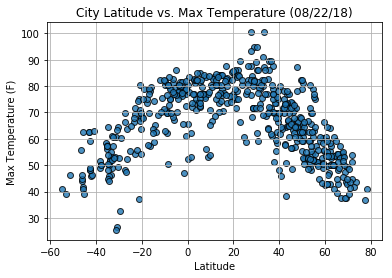

#### Latitude vs. Humidity Plot

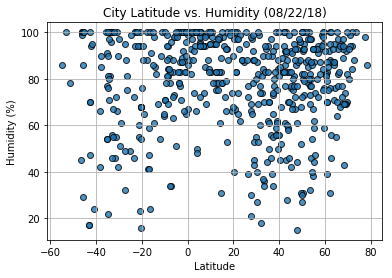

#### Latitude vs. Cloudiness Plot

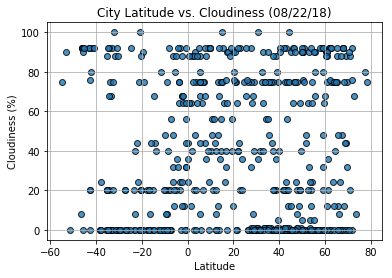

#### Latitude vs. Wind Speed Plot

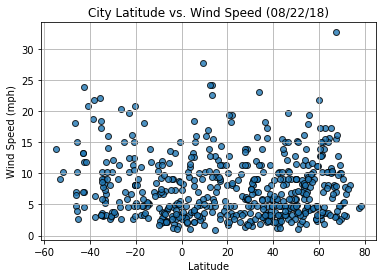